In [2]:
import numpy as np
import pandas as pd
import glob
from model.ctabgan import CTAB_XTRA_DP
df = pd.read_csv("datasets/adult.csv")
#df = df.drop(columns=['Year','Model'])


#df.loc[:7, 'capital-gain'] = np.nan
df = df.head(1000)
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17,4,28544,1,4,12,1,4,0,0,0,20,39,0
996,59,2,662460,0,6,10,4,4,0,0,0,15,39,0
997,22,4,152328,15,4,5,1,4,1,0,0,40,39,0
998,40,4,120277,9,2,12,0,4,1,0,0,45,39,0


In [3]:
from model.ctabgan import CTAB_XTRA_DP
from model.eval.evaluation import get_utility_metrics,stat_sim,privacy_metrics
import numpy as np
import pandas as pd
import glob

In [4]:
from model.eval.evaluation import split_data

train, test = split_data(df,target="income")
train.head(20)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
962,48,4,238567,4,2,6,0,4,1,0,0,40,26,0
756,31,2,197550,11,0,10,4,4,1,0,0,33,39,0
900,50,4,69345,11,2,7,0,4,1,0,1902,44,39,1
416,30,4,446894,11,2,6,0,4,1,0,0,30,39,0
76,41,4,75012,11,2,7,0,4,1,0,0,50,39,0
528,55,4,202652,9,4,4,1,4,0,0,0,35,39,0
819,28,2,191088,9,0,10,1,4,0,2354,0,60,39,0
502,36,2,237713,15,2,13,0,4,1,0,0,40,39,0
591,31,4,188246,15,2,6,0,4,1,0,0,40,39,1
30,46,7,106444,15,2,4,0,2,1,7688,0,38,39,1


In [5]:

synthesizer =  CTAB_XTRA_DP(train,

                 categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'], 
                 log_columns = [],
                 mixed_columns= {'capital-loss':[0.0],'capital-gain':[0.0]},
                 general_columns = ["age"],

                 integer_columns = ['age', 'fnlwgt','capital-gain', 'capital-loss','hours-per-week'],
                 problem_type= ("Classification", 'income')) 

In [ ]:
synthesizer.fit(1)

Start training with 1 epochs
 5 critic iterations
 1 steps per epoch
 batch size 500
Using auxilarary classifier. Problem type: Classification, target: income


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
syn = synthesizer.generate_samples(1000)
syn.head(100)
syn.describe()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.663000,3.607000,179946.781000,7.287000,2.978000,6.757000,2.392000,1.88700,0.514000,20208.848000,951.030000,50.225000,21.478000,0.363000
std,0.988133,2.533173,67143.226448,4.567657,2.009865,4.242399,1.772421,1.45889,0.500054,28493.035883,944.508376,23.064352,14.206454,0.481105
min,43.000000,0.000000,34021.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000
25%,45.000000,1.000000,158728.500000,3.000000,1.000000,3.000000,1.000000,1.00000,0.000000,0.000000,0.000000,35.000000,6.000000,0.000000
50%,46.000000,4.000000,183944.000000,7.000000,3.000000,7.000000,2.000000,2.00000,1.000000,6416.000000,1863.000000,50.000000,24.000000,0.000000
75%,46.000000,6.000000,223011.250000,11.000000,5.000000,10.000000,4.000000,3.00000,1.000000,22543.000000,1863.000000,67.000000,35.000000,1.000000
max,49.000000,7.000000,359442.000000,15.000000,6.000000,14.000000,5.000000,4.00000,1.000000,99985.000000,2402.000000,137.000000,40.000000,1.000000


In [8]:
df.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,38.088000,3.887000,185524.965000,10.228000,2.631000,6.515,1.393000,3.66700,0.696000,1483.701000,86.567000,40.5680,37.117000,0.240000
std,13.712195,1.506154,100130.729371,3.958495,1.430694,4.103,1.603472,0.82994,0.460213,9277.775763,395.196325,12.1743,7.086856,0.427297
min,17.000000,0.000000,20308.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000
25%,26.000000,4.000000,113226.000000,9.000000,2.000000,3.000,0.000000,4.00000,0.000000,0.000000,0.000000,40.0000,39.000000,0.000000
50%,36.500000,4.000000,177493.000000,11.000000,2.000000,7.000,1.000000,4.00000,1.000000,0.000000,0.000000,40.0000,39.000000,0.000000
75%,47.000000,4.000000,236861.000000,12.000000,4.000000,10.000,3.000000,4.00000,1.000000,0.000000,0.000000,45.0000,39.000000,0.000000
max,90.000000,7.000000,662460.000000,15.000000,6.000000,14.000,5.000000,4.00000,1.000000,99999.000000,2444.000000,99.0000,40.000000,1.000000


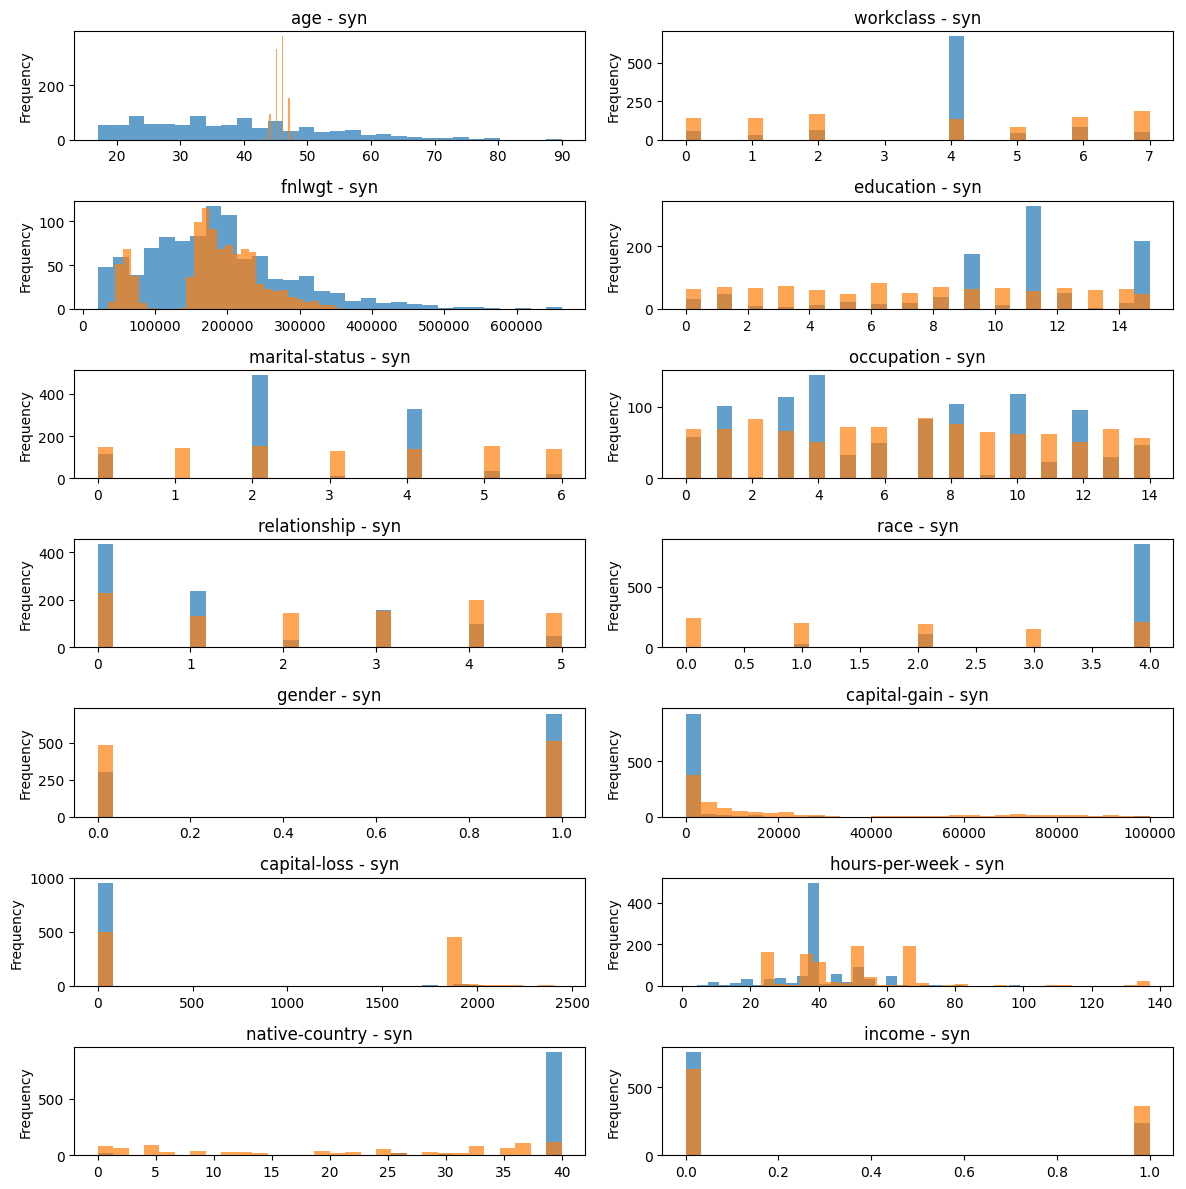

In [9]:
import matplotlib.pyplot as plt

# Create subplots dynamically based on the number of columns
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Ensure enough rows for the number of columns

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 12))

# Flatten axes into a 1D array for easier indexing
axes = axes.ravel()

for i, column in enumerate(df.columns):
    df[column].plot(kind='hist', ax=axes[i], title=f'{column} - df', bins=30, alpha=0.7)
    syn[column].plot(kind='hist', ax=axes[i], title=f'{column} - syn', bins=30, alpha=0.7)

plt.tight_layout()
plt.show()



In [10]:

from model.eval.evaluation import stat_sim

stat_sim(df,syn, ["workclass"])


(  Metric  Weighted_Avg      Mean       Std
 0    JSD      0.489630  0.489630       NaN
 1     WD      0.198037  0.198037  0.127093,
             Column Metric  Distance  Weight
 0              age     WD  0.173904     1.0
 1        workclass    JSD  0.489630     1.0
 2           fnlwgt     WD  0.043189     1.0
 3        education     WD  0.196067     1.0
 4   marital-status     WD  0.127833     1.0
 5       occupation     WD  0.030714     1.0
 6     relationship     WD  0.199800     1.0
 7             race     WD  0.445000     1.0
 8           gender     WD  0.182000     1.0
 9     capital-gain     WD  0.187443     1.0
 10    capital-loss     WD  0.353858     1.0
 11  hours-per-week     WD  0.117296     1.0
 12  native-country     WD  0.394375     1.0
 13          income     WD  0.123000     1.0,
 np.float64(0.09275881486583706))

In [11]:
from model.eval.evaluation import privacy_metrics
privacy_metrics(df,syn)

[                rr        ff        rf
 nndr_5th  0.455061  0.608505  0.650003
 dcr_5th   0.021106  0.093559  0.106992,
 np.float64(0.8833333333333333),
 np.float64(1.866163429588655)]